In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# Measures of location

There are 3 measures of location: Mean, Median and Mode and they describe the central tendency of the data, i. e., through a number we can have an idea about where most of the data is located, they sumarize what are the typical elements in a dataset. All of them are what is called descriptive statistics which quantitatively describes or summarizes features from a dataset.

❗️ I'll continue working on the same dataset used in the previous notebook: [Frequency distribution](1_1_frequency_distribution.ipynb/). Make sure you are familiar with its structure before moving forward. Here's a review:


In [2]:
data = pd.read_csv("./data/national_household_sample_survey.csv")
gender_mapping = {0: "Male", 1: "Female"}
skin_color_mapping = {
    0: "Indígena",
    2: "White",
    4: "Black",
    6: "Yellow",
    8: "Parda",
    9: "N/A",
}
data

,State,Gender,Age,Skin color,Years of study,Income,Height
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## Mean

Mean is a measure of central tendency aka a measure of location. It's usually known as average, but in mathematical terms, you'd recognize it as mean, also because different types of means can be calculated. For the sake of simplicity, I'll approach the mean here with the same meaning as the average of a data collection.

To illustrate the concept of mean I'll use the following dataset:

`[9, 5, 8, 10, 7]`

Imagine that this dataset represents the grades of all the students in a class of statistics. The grades can range from 0 to 10.

How can we calculate the center of this data? What is the average grade for this class?

The mean is calculated by the sum of all observations divided by the number of observations. 

#### Sample

> In statistics, quality assurance, and survey methodology, sampling is the selection of a subset (a statistical sample) of individuals from within a statistical population to estimate characteristics of the whole population. Statisticians attempt to collect samples that are representative of the population in question. [Wikipedia](https://en.wikipedia.org/wiki/Sampling_(statistics))

## $$ \bar{x} = \frac{1}{n}\left (\sum_{i=1}^n{x_i}\right ) = \frac{x_1+x_2+\cdots +x_n}{n} $$

where:
- ${n}$ is the number os observations or size of the dataset
- $ \bar{x} $ is the mean of the dataset

#### Population

> In statistics, a population is a set of similar items or events which is of interest for some question or experiment. A statistical population can be a group of existing objects or a hypothetical and potentially infinite group of objects conceived as a generalization from experience. [Wikipedia](https://en.wikipedia.org/wiki/Statistical_population)

## $$ \mu = \frac{1}{N}\left (\sum_{i=1}^N{x_i}\right ) = \frac{x_1+x_2+\cdots +x_N}{N} $$

where:
- ${N}$ is the number of observations or size of the dataset
- $ \mu $ is the mean of the dataset

#### Characteristics of the mean

- It can be seen as a dataset's point of balance
- It is senstive to outliers (data points that differ significantly from the rest of the observations), i. e., extreme values will pull the mean closer to them.

In [3]:
dataset = [9,5,8,10,7]
n = len(dataset)
mean = sum(dataset) / n
print(f"The mean or the average grade for this class is: {mean}")

The mean or the average grade for this class is: 7.8


In [4]:
mean_np = np.mean(dataset)
print(f"The mean or the average grade for this class is: {mean_np}")

The mean or the average grade for this class is: 7.8


In [26]:
mean_income = np.mean(data["Income"])
mean_age = np.mean(data["Age"])
mean_height = np.mean(data["Height"])
print(f"The mean income is {mean_income}")
print(f"The mean age is {mean_age}")
print(f"The mean height is {round(mean_height, 4)} meters")

The mean income is 2000.3831988547631
The mean age is 44.07142113482561
The mean height is 1.6995 meters


In [23]:
income_grouped_by_gender = data.groupby(["Gender"])["Income"].mean()
print(f"The average income of a male if {income_grouped_by_gender[0]}")
print(f"The average income of a female if {income_grouped_by_gender[1]}")
income_grouped_by_gender


The average income of a male if 2192.4415962441312
The average income of a female if 1566.84739296312


Gender
0    2192.441596
1    1566.847393
Name: Income, dtype: float64

As I said above the mean is sensitive to outliers. The random variable height has a mean of 1.69. Let's visualize the distribution and where the mean is located:

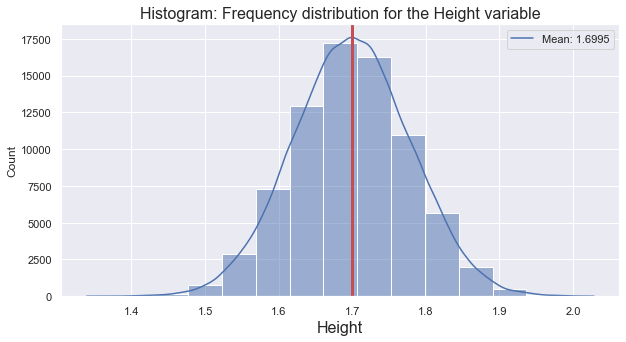

In [53]:
mean_height = data["Height"].mean()
fix, ax = plt.subplots(1,1, figsize=(10, 5));
ax.set_title("Histogram: Frequency distribution for the Height variable", fontsize=16);
ax.set_xlabel("Height", fontsize=16);
sns.histplot(data["Height"], ax=ax, bins=15, kde=True);
plt.axvline(x=mean_height, linewidth=3, color="r")
plt.legend(labels=[f"Mean: {round(mean_height, 4)}"]);

Now I'll add extreme values to the dataset. Observe how the mean is pulled closer to the place where the outliers were introduced.

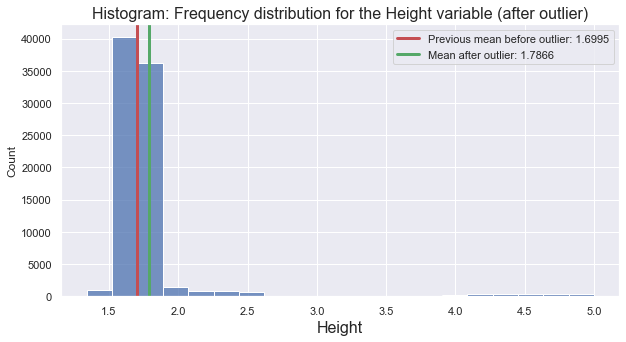

In [92]:
height_with_outlier = pd.concat([data["Height"], pd.Series(1.6 + np.random.sample(4000)), pd.Series(4 + np.random.sample(2000))])
mean_height_with_outlier = height_with_outlier.mean()
fix, ax = plt.subplots(1,1, figsize=(10, 5));
ax.set_title("Histogram: Frequency distribution for the Height variable (after outlier)", fontsize=16);
ax.set_xlabel("Height", fontsize=16);
plt.axvline(x=mean_height, linewidth=3, color="r")
plt.axvline(x=mean_height_with_outlier, linewidth=3, color="g")
sns.histplot(height_with_outlier, ax=ax, bins=20);
plt.legend(labels=[f"Previous mean before outlier: {round(mean_height, 4)}"]);
plt.legend(labels=[f"Previous mean before outlier: {round(mean_height, 4)}", f"Mean after outlier: {round(mean_height_with_outlier, 4)}"]);

## Median

The Median, similar to the mean, is also a measure of central tendency and its purpose is to understand where is the center of the data.
To illustrate the concept of mean I'll use the following dataset:

`[9, 5, 8, 10, 7]`

Imagine that this dataset represents the grades of all the students in a class of statistics. The grades can range from 0 to 10.

To calculate the median we need:

1. Sort the dataset = `[5, 7, 8, 9, 10]`
2. We now have to find the number that is exactly in the middle: 8 is the median

But what if the dataset had an even number of data points? For example:

`[5, 7, 8, 9, 9, 10]`

What is the median in this case?

1. Find the two numbers in the middle, or split the dataset in the middle. The two numbers we're looking for will be the ones that are on the edges of each half

Half 1: `[5, 7, 8]` & Half 2: `[9, 9, 10]`

The two numbers we're looking for in this case are 8 and 9

2. Calculate the mean of the two numbers in the middle

(8 + 9) / 2 = 8.5 is the median


$$ \large 
median\left(x\right)
=\begin{cases}
  x_\frac{n+1}{2}                                    & n\text{ odd}\\
  \frac {1}{2}\left(x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}\right) & n \text{ even}
\end{cases}
 $$

where:

- $ n $ is the size of the dataset


#### Characteristics of the median

- The median value divides the dataset exactly in the middle,  i. e., 50% of the data lies on the left and 50% of the data lies on right.
- It is not as affected by extreme values like the mean because it's the middle value of a dataset and not the average between all the values of a dataset.



In [87]:
dataset_odd = [9,5,8,10,7]
dataset_odd.sort()
# Here I don't add 1 to the length of the dataset because in programming we start counting indexes at 0
idx_element_middle = int(len(dataset_odd)/2)
element_middle = dataset_odd[idx_element_middle]
print(f"The median for this class is: {element_middle}")

The median for this class is: 8


In [88]:
dataset_even = [9,5,8,10,7,9]
dataset_even.sort()
idx_element_middle_left_half = int((len(dataset_even) / 2) - 1)
idx_element_middle_right_half = int(len(dataset_even) / 2)
mean_of_center_elements = (dataset_even[idx_element_middle_left_half] + dataset_even[idx_element_middle_right_half]) / 2
print(f"The median for this class is: {mean_of_center_elements}")

The median for this class is: 8.5


In [93]:
print(f"The median height for dataset before the outliers: {np.median(data['Height'])}")
print(f"The median height for dataset after the outliers: {np.median(height_with_outlier)}")

The median height for dataset before the outliers: 1.6993247325
The median height for dataset after the outliers: 1.7059874000000002


As you can see the median of the dataset with outliers didn't change much from the mean of the dataset without outliers, but the mean changed more drastically.

#### 🤔 Should I use the mean or the median to understand the central tendency of a dataset?

Mean and Median are measures of center, i. e., they tell us where is the center of our data, but if they tell us the same thing what's the difference? Why do we have two different measures of center and which one should be used?

As with everything in life, it depends 😅
To understand the difference let's use the following dataset that represents the grades of a statistics student for a year. The grades range from 0 to 10:

`[9, 10, 8, 9, 10, 9.8, 10, 9.4, 10, 9.7]`

Let's say that by the end of the year we want to calculate a summary score that tells us in one number how the student performed the whole year. 
The mean can help us here.

In [103]:
grades = [9, 10, 8, 9, 10, 9.8, 10, 9.4, 10, 9.7]
mean = np.mean(grades)
print(f"The mean grade for this student is: {round(mean, 1)}")

The mean grade for this student is: 9.5


The mean seems to be very consistent with the performance of this student throughout the year, doesn't it? Let's calculate the median now.

In [104]:
median = np.median(grades)
print(f"The median for this student's grades is: {round(median, 1)}")

The median for this student's grades is: 9.8


Also very consistent and close to the mean. So now, what's the point of having two different measures of center?

Let's imagine this situation: this student took the final exam last week and unfortunately because of a personal stressful situation it was very difficult to concentrate and the grade for the final exam was `0`.

![Alt Text](https://media.giphy.com/media/d2lcHJTG5Tscg/giphy.gif)

Let's now add this final grade to our dataset and calculate the mean again:

In [105]:
grades = [9, 10, 8, 9, 10, 9.8, 10, 9.4, 10, 9.7, 0]
mean = np.mean(grades)
print(f"The mean grade for this student is: {round(mean, 1)}")

The mean grade for this student is: 8.6


Is it fair to say that the yearly performance of this student is `8.6` when we look at all grades? Most of the grades were close to `10`.
Let's take a look at the median:

In [106]:
median = np.median(grades)
print(f"The median for this student's grades is: {round(median, 1)}")

The median for this student's grades is: 9.7


The median is much close to the actual performance of this student when we consider all the grades. So, what's the point?

### The mean is sensitive toward outliers
An outlier is an observation or a value, in this case, is a grade, that lies an abnormal distance from other values. It means that even though this student performed very well, one outlier dragged the average grade down and I think it's not fair in this case. The same would happen for a student that hasn't performed the whole year, but for some reason get good results in the final exams. Should we consider this student a dedicated one?

As said, the measure that you're gonna use depends on what you want to know about the data. Does it make sense to include outliers or not? Your goal will tell you.
In this case, if we're measuring the performance of a student for the year I think the median represents better the whole data.
Maybe the outlier was even a mistake of the teacher when sharing the grades.
This is something that needs to be considered in every case.

### When to consider outliers in your analysis?
It depends on your goal and what conclusion you want to derive from the data. You can ask yourself if in a given situation considering outliers is important or not. Let's say that this school wants to run an experiment to find anomalies in the student's grades, for example, to find students that for some reason stopped performing consistently. Maybe considering the outliers would be beneficial to reach the conclusions in this case.

To sum up, don't add or remove outliers (or use the mean or median) without thinking about what is your goal. Understand your data. Your data has different ways to tell you stories, it's up to you to understand which story is more important to you in a given situation.

And oh, the teachers realized that something happened with the student and gave him a chance to do the test again. His score was `10`. All is good in Statsland!


![Alt Text](https://media.giphy.com/media/cl27Mh8srUEog5GtUR/giphy.gif)


## Mode
To calculate the mode we need to know the number of occurrences of a datapoint in a dataset.

`[9, 5, 8, 10, 7, 8]`

Imagine that this dataset represents the grades of all the students in a class of statistics. The grades can range from 0 to 10.

We want to know the numbers that occur most frequently in the dataset.

| Number | Occurrences |
|--------|-------------|
| 9      | 1           |
| 5      | 1           |
| 7      | 1           |
| 8      | 2           |
| 10     | 1           |



The number 8 is the most frequent in the dataset therefore it is the mode.
What if we had more than one value with the same number of occurrences in a data set?

`[9, 5, 8, 10, 7, 7, 8]`

| Number | Occurrences |
|--------|-------------|
| 9      | 1           |
| 5      | 1           |
| 7      | 2           |
| 8      | 2           |
| 10     | 1           |

We could either say that the dataset has no mode or that it is bi-modal, i.e., it has two modes: 7 and 8.

If there are more than 2 modes usually we say that the dataset has no mode because we want to have a clear mode that summarizes our dataset. Of course, it depends on the purpose of each data analysis, but the purpose of the mode is to give a clear indicator of what is the most frequent value in a dataset.

In [97]:
from collections import Counter
dataset = [9,5,8,10,7,10]
frequencies = Counter(dataset)
print(frequencies)
print(f"The mode for the dataset is: {frequencies.most_common(1)[0][0]}")

Counter({10: 2, 9: 1, 5: 1, 8: 1, 7: 1})
The mode for the dataset is: 10


In [102]:
from scipy.stats import mode
print(f"The mode for the age is: {mode(data['Age'], keepdims=True).mode[0]}")

The mode for the age is: 40


## More resources

I created a deck summarising what I cover in this Notebook.

https://pitch.com/public/988bee38-e9c8-442c-9884-04f81b50a538

<iframe src="https://pitch.com/embed/988bee38-e9c8-442c-9884-04f81b50a538" allow="fullscreen" allowfullscreen="" width="560" height="368" style="border:0"></iframe>